In [ ]:
#! default_exp app

# Art Catagorizer

In [ ]:
!pip install -Uqq fastai gradio nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 973.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.4/67.4 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 436.6/436.6 kB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 99.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63

In [ ]:
#!export
from fastai.vision.all import *
from fastai.vision.all import load_learner
import gradio as gr

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Master Course- Data science/Image_processing_lec/project

/content/drive/MyDrive/Master Course- Data science/Image_processing_lec/project


In [ ]:
#!export
image_path = 'test_images'
version = 1
model_path = f'models/art-recognizer-v{version}.pth'
model = load_learner(f'models/art-recognizer-v{version}.pk1')

In [ ]:
#!export
# List of art forms
art_labels = ('Art Deco',
              'Art Nouveau',
              'Avant-Garde',
              'Bauhaus',
              'Cubism',
              'Dadaism',
              'Futurism',
              'Gothic Art',
              'Hyperrealism',
              'Impressionism',
              'Minimalism',
              'Neoclassicism Painting',
              'Pop Art',
              'Rococo',
              'Surrealism')

def recognize_image(image):
  ored, idx, probs = model.predict(image)
  return dict(zip(art_labels, map(float,probs)))

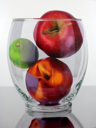

In [ ]:
img = PILImage.create(f'data/{image_path}/f97cb2052a80438eb1de81c81556f101_sw-3221_sh-4307.png')
img.thumbnail((128,128))
img

In [ ]:
recognize_image(img)

{'Art Deco': 0.004028685856610537,
 'Art Nouveau': 0.0017211022786796093,
 'Avant-Garde': 0.021208131685853004,
 'Bauhaus': 0.007481737062335014,
 'Cubism': 0.02573343925178051,
 'Dadaism': 0.0022163500543683767,
 'Futurism': 0.006650188472121954,
 'Gothic Art': 0.0010562613606452942,
 'Hyperrealism': 0.8718031048774719,
 'Impressionism': 0.0073051475919783115,
 'Minimalism': 0.010313617996871471,
 'Neoclassicism Painting': 0.006838669069111347,
 'Surrealism': 0.010498521849513054,
 'Pop Art': 0.0002575679973233491,
 'Rococo': 0.022887347266077995}

In [ ]:
def highest_valued_key(d):
    return max(d, key=d.get)
highest_valued_key(recognize_image(img))

'Hyperrealism'

In [ ]:
#!export
# image = gr.inputs.Image(shape=(128,128))
# label = gr.outputs.Label()
examples = [
    f'data/{image_path}/318e97d070a64117b5f0e11d1b400ac0_sw-3598_sh-2864.png',
    f'data/{image_path}/55da4620b6a543a0b8911f6e3b3556e5_sw-2924_sh-2924.png',
    f'data/{image_path}/60c0bc4a8f8c4c7b823a2e521e9e92f1_sw-1280_sh-1277.png',
    f'data/{image_path}/6fbb1f7dd9a14dfc904ccdcdf38585cf_sw-4854_sh-6327.png',
    f'data/{image_path}/7ca2d0a2badf40c0a3ecbc11b1b9d9b7_sw-3568_sh-2873.png',
    f'data/{image_path}/a23cb16bb7d74c6ca0f82425dff83038_sw-2404_sh-3226.png',
    f'data/{image_path}/a3f0f15b5f8b4a81ab7b43ce7a7f010f_sw-1735_sh-2018.png',
    f'data/{image_path}/b05f56198e124b0b939a4833124ed120_sw-3032_sh-3084.png',
    f'data/{image_path}/ba504178173346a197bdd27c897cce0f_sw-700_sh-700.png',
    f'data/{image_path}/c356a06a48b8433a8849423baf100d76_sw-2189_sh-3349.png',
    f'data/{image_path}/c963c33c399d4591ad9184f62c40d595_sw-4751_sh-4794.png',
    f'data/{image_path}/d932a11b39d44846952c8f4ec4cc8d64_sw-1597_sh-1582.png',
    f'data/{image_path}/e1f7a31e434044138da27d13ba04a287_sw-1280_sh-1280.png',
    f'data/{image_path}/f97cb2052a80438eb1de81c81556f101_sw-3221_sh-4307.png'
]
# Define your interface
iface = gr.Interface(
    fn=recognize_image,
    inputs=gr.Image(type="filepath",width=200, height=200),
    outputs=gr.Label(),
    examples=examples
)
iface.launch(inline=False)




Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://c8836994bbd9325ac1.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:

from nbdev.export import